##Let’s begin here…

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import os

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [31]:
train_folder= '/content/drive/MyDrive/dataset/Archive/train'
val_folder = '/content/drive/MyDrive/dataset/Archive/val'
test_folder = '/content/drive/MyDrive/dataset/Archive/test'
path_normal= '/content/drive/MyDrive/dataset/Archive/train/NORMAL'
path_pneumonia = '/content/drive/MyDrive/dataset/Archive/train/PNEUMONIA'
normal=os.listdir(path_normal)
pneumonia= os.listdir(path_pneumonia)

### Train Data

In [32]:
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

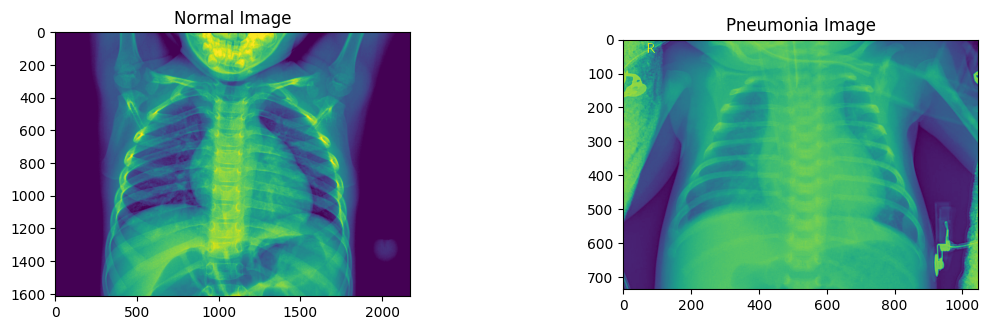

In [33]:
#image visualize
import matplotlib.image as mpimg
image_normal=  mpimg.imread(os.path.join(path_normal,'IM-0177-0001.jpeg'))
image_pneumonia = mpimg.imread(os.path.join(path_pneumonia,'person20_bacteria_66.jpeg'))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].imshow(image_normal)
axs[0].set_title('Normal Image')


axs[1].imshow(image_pneumonia)
axs[1].set_title('Pneumonia Image')
plt.tight_layout()
plt.subplots_adjust(wspace=0.6)
plt.show()

In [34]:
data = []

for img_file in normal:
    image=Image.open(path_normal+'/'+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

for img_file in pneumonia:
    image=Image.open(path_pneumonia+'/' +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

type(data)
len(data)

5216

## Defining Model

In [36]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(32, (3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(activation = 'relu', units = 128))
cnn_model.add(Dense(activation = 'sigmoid', units = 1))

## Compile Model

In [37]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [39]:

train_set = train_datagen.flow_from_directory(train_folder,
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(val_folder,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Fit Model

In [40]:
cnn_model_his = cnn_model.fit(train_set,
                              steps_per_epoch = 163,
                              epochs = 5,
                              validation_data = validation_set,
                              validation_steps = 624)

Epoch 1/5
163/163 [==============================] - ETA: 0s - loss: 0.4035 - accuracy: 0.8461

163/163 [==============================] - 260s 2s/step - loss: 0.4035 - accuracy: 0.8461 - val_loss: 0.6014 - val_accuracy: 0.8125
Epoch 2/5
163/163 [==============================] - 254s 2s/step - loss: 0.2102 - accuracy: 0.9156
Epoch 3/5
163/163 [==============================] - 244s 1s/step - loss: 0.1979 - accuracy: 0.9195
Epoch 4/5
163/163 [==============================] - 246s 2s/step - loss: 0.1919 - accuracy: 0.9248
Epoch 5/5
163/163 [==============================] - 253s 2s/step - loss: 0.1706 - accuracy: 0.9358


##Testing the image and predit probability

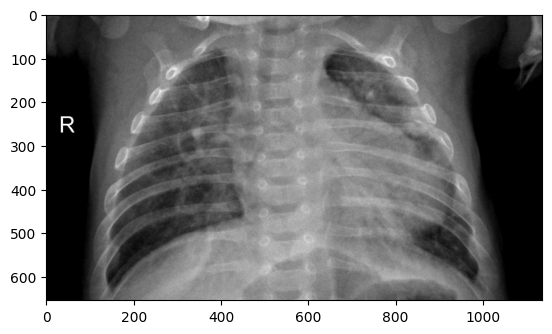

1/1 [==============================] - 0s 167ms/step
Prediction Probabilities: [[0.9980439]]
Normal


In [42]:

import cv2
image = cv2.imread('/content/drive/MyDrive/dataset/Archive/test/PNEUMONIA/person1_virus_13.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (150, 150))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 150, 150, 3))
prediction = cnn_model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')


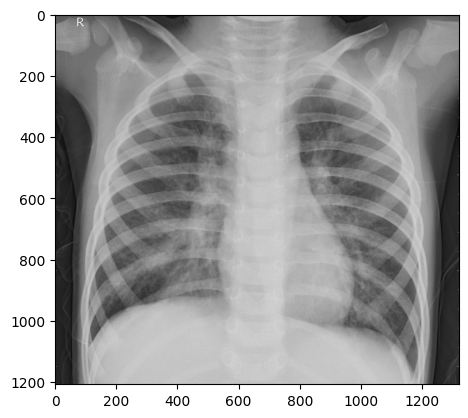

1/1 [==============================] - 0s 28ms/step
Prediction Probabilities: [[0.6230966]]
Normal


In [53]:
image = cv2.imread('/content/drive/MyDrive/dataset/Archive/test/PNEUMONIA/person20_virus_51.jpeg')
plt.imshow(image)
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (150, 150))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 150, 150, 3))
prediction = cnn_model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

## Evaluate Model

### Accuracy

In [ ]:
test_acc = cnn_model.evaluate(test_set)
print('The testing accuracy is :',test_acc[1]*100, '%')

The testing accuracy is : 91.36195778846741 %


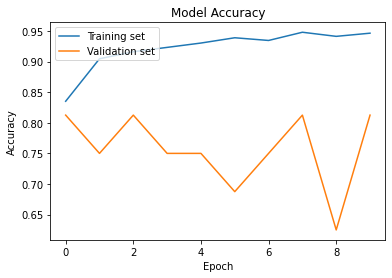

In [ ]:
plt.plot(cnn_model_his.history['accuracy'])
plt.plot(cnn_model_his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

### Loss

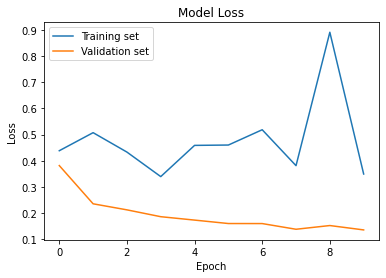

In [ ]:
plt.plot(cnn_model_his.history['val_loss'])
plt.plot(cnn_model_his.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()